In [11]:
from Polina import indicator
from Polina import grade_territory
from Roma import graphbuilder_v2
import momepy

In [7]:
import sys
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

In [5]:
lo_polygon = ox.geocode_to_gdf('R176095', by_osmid=True).to_crs(epsg=32636)
spb_polygon = ox.geocode_to_gdf('R337422', by_osmid=True).to_crs(epsg=32636).buffer(3000)
city = lo_polygon.union(spb_polygon).to_crs(epsg=4326) #  get lo polygon

russia = ox.geocode_to_gdf("Russia") #  get border of the country

regions = gpd.read_file('Polina/russia.geojson') #  get regions
regions = regions[regions['ISO3166-2']!='RU-CHU']
regions = regions.to_crs(city.crs)

In [ ]:
citygraph = graphbuilder_v2.get_graph_from_polygon(city, crs=32636,country_polygon=russia)


In [14]:
carcas = graphbuilder_v2.get_frame(citygraph,regions,city)

In [16]:
cities = gpd.read_file('/Users/polina/Desktop/github/transport_frames/17(18)_centers.geojson')
frame = graphbuilder_v2.assign_city_names_to_nodes(cities.to_crs(frame.graph['crs']), momepy.nx_to_gdf(frame)[0], frame, name_col='name18', max_distance=1200)


# Оценка неудобий

In [19]:
p1 = gpd.read_file('Polina/lo_gdfs/Аэродром лодейнопольское поселение.geojson')
p2 = gpd.read_file('Polina/lo_gdfs//Аэродром Сиверск .geojson')
p3 = gpd.read_file('Polina/lo_gdfs//project Светогорского поселения.geojson')
p4 = gpd.read_file('Polina/lo_gdfs//project Шлиссельбург.geojson')
neudobiya = pd.concat([p1,p2,p3,p4])


In [21]:
n_grade = grade_territory.grade_territory(neudobiya, carcas)
n_grade

name       type addr:street addr:housenumber addr:city is_living  \
0  Лодейное Поле  aerodrome        None             None      None      None   
0      Сиверский  aerodrome        None             None      None      None   
0           None    project        None             None       NaN      None   
0           None    project        None             None      None     False   

                                            geometry     full_id building  \
0  MULTIPOLYGON (((529877.020 6730827.593, 529893...         NaN      NaN   
0  MULTIPOLYGON (((329788.882 6583309.434, 330250...  w252291127     None   
0  POLYGON ((278277.965 6784490.204, 279737.375 6...         NaN     None   
0  POLYGON ((387861.999 6644712.938, 388202.551 6...         NaN     None   

  addr:subdistrict  ... addr:district design:year building:levels   fid  \
0              NaN  ...           NaN         NaN             NaN   NaN   
0             None  ...          None        None            None   NaN   
0              NaN  ...           NaN         NaN            None  None   
0              NaN  ...           NaN         NaN             NaN   NaN   

  dist_to_reg1  dist_to_reg2  dist_to_edge  dist_to_priority_reg1  \
0  1494.150809    757.759054    752.146455            1494.150809   
0  2648.353979     16.834102     12.216409            2648.353979   
0  2238.002419    235.876922      0.000000            2238.002419   
0    46.463301      0.000000      0.000000              46.463301   

   dist_to_priority_reg2  grade  
0            1370.016527    4.5  
0            2799.307739    4.5  
0            2238.002419    4.5  
0              64.295440    4.5  

[4 rows x 21 columns]

In [22]:
n_grade = grade_territory.grade_territory(neudobiya, carcas,include_priority=True)
n_grade

name       type addr:street addr:housenumber addr:city is_living  \
0  Лодейное Поле  aerodrome        None             None      None      None   
0      Сиверский  aerodrome        None             None      None      None   
0           None    project        None             None       NaN      None   
0           None    project        None             None      None     False   

                                            geometry     full_id building  \
0  MULTIPOLYGON (((529877.020 6730827.593, 529893...         NaN      NaN   
0  MULTIPOLYGON (((329788.882 6583309.434, 330250...  w252291127     None   
0  POLYGON ((278277.965 6784490.204, 279737.375 6...         NaN     None   
0  POLYGON ((387861.999 6644712.938, 388202.551 6...         NaN     None   

  addr:subdistrict  ... addr:district design:year building:levels   fid  \
0              NaN  ...           NaN         NaN             NaN   NaN   
0             None  ...          None        None            None   NaN   
0              NaN  ...           NaN         NaN            None  None   
0              NaN  ...           NaN         NaN             NaN   NaN   

  dist_to_reg1  dist_to_reg2  dist_to_edge  dist_to_priority_reg1  \
0  1494.150809    757.759054    752.146455            1494.150809   
0  2648.353979     16.834102     12.216409            2648.353979   
0  2238.002419    235.876922      0.000000            2238.002419   
0    46.463301      0.000000      0.000000              46.463301   

   dist_to_priority_reg2  grade  
0            1370.016527      5  
0            2799.307739      5  
0            2238.002419      5  
0              64.295440      5  

[4 rows x 21 columns]

In [45]:
grade_territory.create_buffered_gdf(n_grade, carcas).explore()

# Оценка гпсп

In [24]:
polygons188 = gpd.read_file('Polina/lo_gdfs/polygons188.geojson')
grade_gpsp = grade_territory.grade_territory(polygons188, carcas)

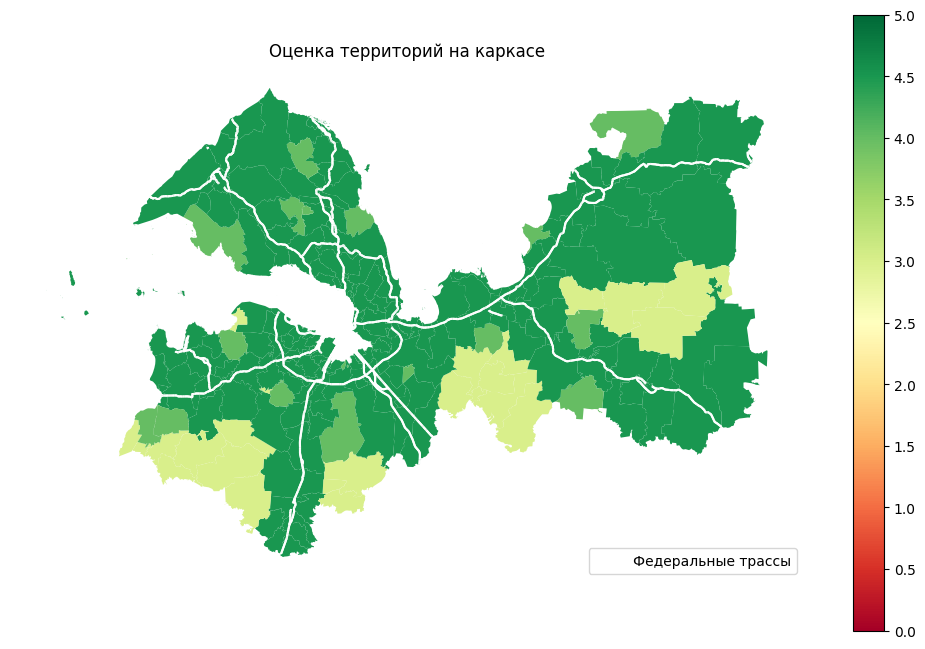

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
grade_gpsp.plot(column='grade', cmap=plt.get_cmap('RdYlGn_r').reversed(), ax=ax, vmin=0,vmax=5, legend=True, markersize=4).set_axis_off()
nodes, edges = momepy.nx_to_gdf(carcas)
edges[edges['reg'] == 1].plot(ax=ax, color='white', label='Федеральные трассы')
colorbar = plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('RdYlGn_r').reversed(), norm=plt.Normalize(vmin=0, vmax=5)), ax=ax)
colorbar.set_ticks(np.arange(0, 5.1, 0.5))
ax.legend(loc='lower right')
fig.delaxes(fig.axes[1])
plt.title('Оценка территорий на каркасе')
plt.savefig('gpsp_priority.png')
plt.show()


In [28]:
grade_gpsp_2 = grade_territory.grade_territory(polygons188, carcas,include_priority=True)

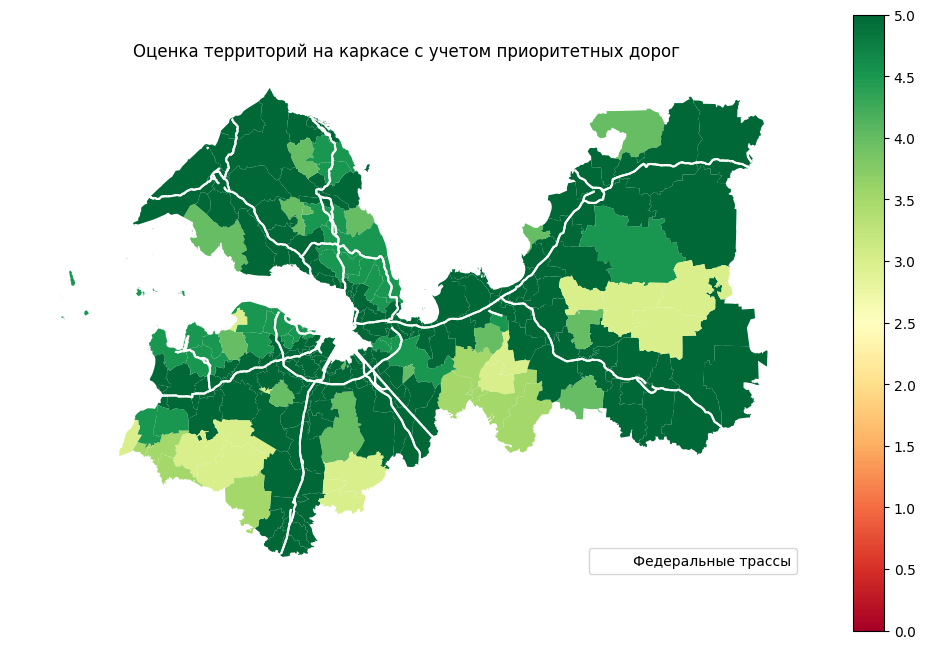

In [36]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(16, 8))
grade_gpsp_2.plot(column='grade', cmap=plt.get_cmap('RdYlGn_r').reversed(), ax=ax, vmin=0, vmax=5,legend=True, markersize=4).set_axis_off()
nodes, edges = momepy.nx_to_gdf(carcas)
edges[edges['reg'] == 1].plot(ax=ax, color='white', label='Федеральные трассы')
colorbar = plt.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('RdYlGn_r').reversed(), norm=plt.Normalize(vmin=0, vmax=5)), ax=ax)
colorbar.set_ticks(np.arange(0, 5.1, 0.5))
ax.legend(loc='lower right')
fig.delaxes(fig.axes[1])
plt.title('Оценка территорий на каркасе с учетом приоритетных дорог')
plt.savefig('gpsp_priority.png')
plt.show()
